In [7]:
import pandas as pd
import numpy  as np

In [8]:
data = pd.read_csv("1.1 data.csv")
data.drop(["id", "Unnamed: 32"], axis=1, inplace=True)

In [9]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x = data.drop(["diagnosis"], axis=1)

In [10]:
x = (x-np.min(x))/(np.max(x)-np.min(x))

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)
print("score: ", rf.score(x_test, y_test))

score:  0.9824561403508771


In [32]:
y_pred = rf.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

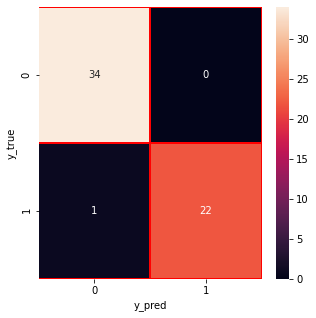

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()